<a href="https://colab.research.google.com/github/akhil-gun/DSI_M3_NLP/blob/dev_mekondjo/Scarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import json
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_json('/content/drive/MyDrive/Module_3/Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [ ]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
df = df.drop('article_link', axis = 1)

In [ ]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [ ]:
df.shape

(28619, 2)

In [ ]:
df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [ ]:
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

In [ ]:
df.head()

,is_sarcastic,headline,clean_text
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress fall short gende...
2,0,eat your veggies: 9 deliciously different recipes,eat veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word streaming co...


In [ ]:
from wordcloud import WordCloud

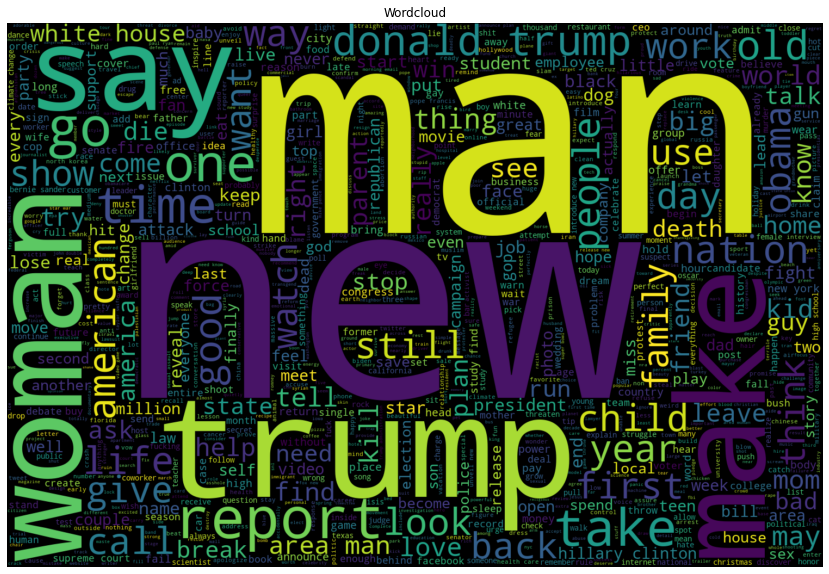

In [ ]:
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
#split into features and label
X = df['clean_text']
y = df['is_sarcastic']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [ ]:
X_train.head()

12170    american express offer month paternity materni...
28552       watch dolphin knocks stand paddleboarder board
6883                          man enjoy thing inform wrong
28387    jonathan lipnicki star young dark helmet space...
12932    publicist worry kanye west support trump damag...
Name: clean_text, dtype: object

In [ ]:
svc =  LinearSVC(C= 10,random_state=42,class_weight='balanced')
svc.fit(X_tfidf_train,y_train)
y_pred_svc = svc.predict(X_tfidf_test)

In [ ]:
print_metrices(y_pred_svc,y_test)

[[3547  908]
 [ 900 3231]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4455
           1       0.78      0.78      0.78      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7894246447705567
Precison :  0.7894115546362934
Recall :  0.7894246447705567
F1 :  0.7894174138845986


In [ ]:
y_pred_svc[3]

1

In [ ]:
test = ['Thats just what I needed today!']
test_vec = tfidf.transform(test)
svc.predict(test_vec)[0]

1

In [ ]:
def make_prediction(sentence):
  test_vec = tfidf.transform(sentence)
  
  if svc.predict(test_vec)[0] == 1:
    print ('Sarcastic')
  else:
    print ('Not Sarcastic')


In [ ]:
make_prediction (['I love the DSI!'])

Not Sarcastic


In [ ]:
make_prediction (['Thats just what I needed today!'])

Sarcastic
